# Scalability test for hybrid MPI + OpenMP parallelization

In [1]:
import csv

# Define the names of the log file and output CSV file
log_file = 'hybrid_scaling.log'
csv_file = 'hybrid_scaling.csv'

# Storing data
data = []
current_data = {}

# Read log file and extract data
with open(log_file, 'r') as file:
    for line in file:
        if line.startswith('\tCommand being timed:'):
            if current_data:
                data.append(current_data)
                current_data = {}
            
            # Extract MPI processes and OpenMP threads
            command = line.split('"')[1]  # Extract the "x_y" part
            mpi_processes, omp_threads = command.split('_')
            
            current_data['MPI Processes'] = mpi_processes
            current_data['OpenMP Threads'] = omp_threads

        elif ':' in line:
            key, value = line.strip().split(':', 1)
            key = key.strip()
            value = value.strip().split(' ')[0]  # To remove units and extra info
            current_data[key] = value

    # Add last block of data if any
    if current_data:
        data.append(current_data)

# Write data to CSV file
fieldnames = data[0].keys()  # Get the keys of the first element of the list

with open(csv_file, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for entry in data:
        writer.writerow(entry)

print('Data extracted and saved to', csv_file)


Data extracted and saved to hybrid_scaling.csv


# Analysis of the Efficiency



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
data = pd.read_csv('hybrid_scaling.csv')

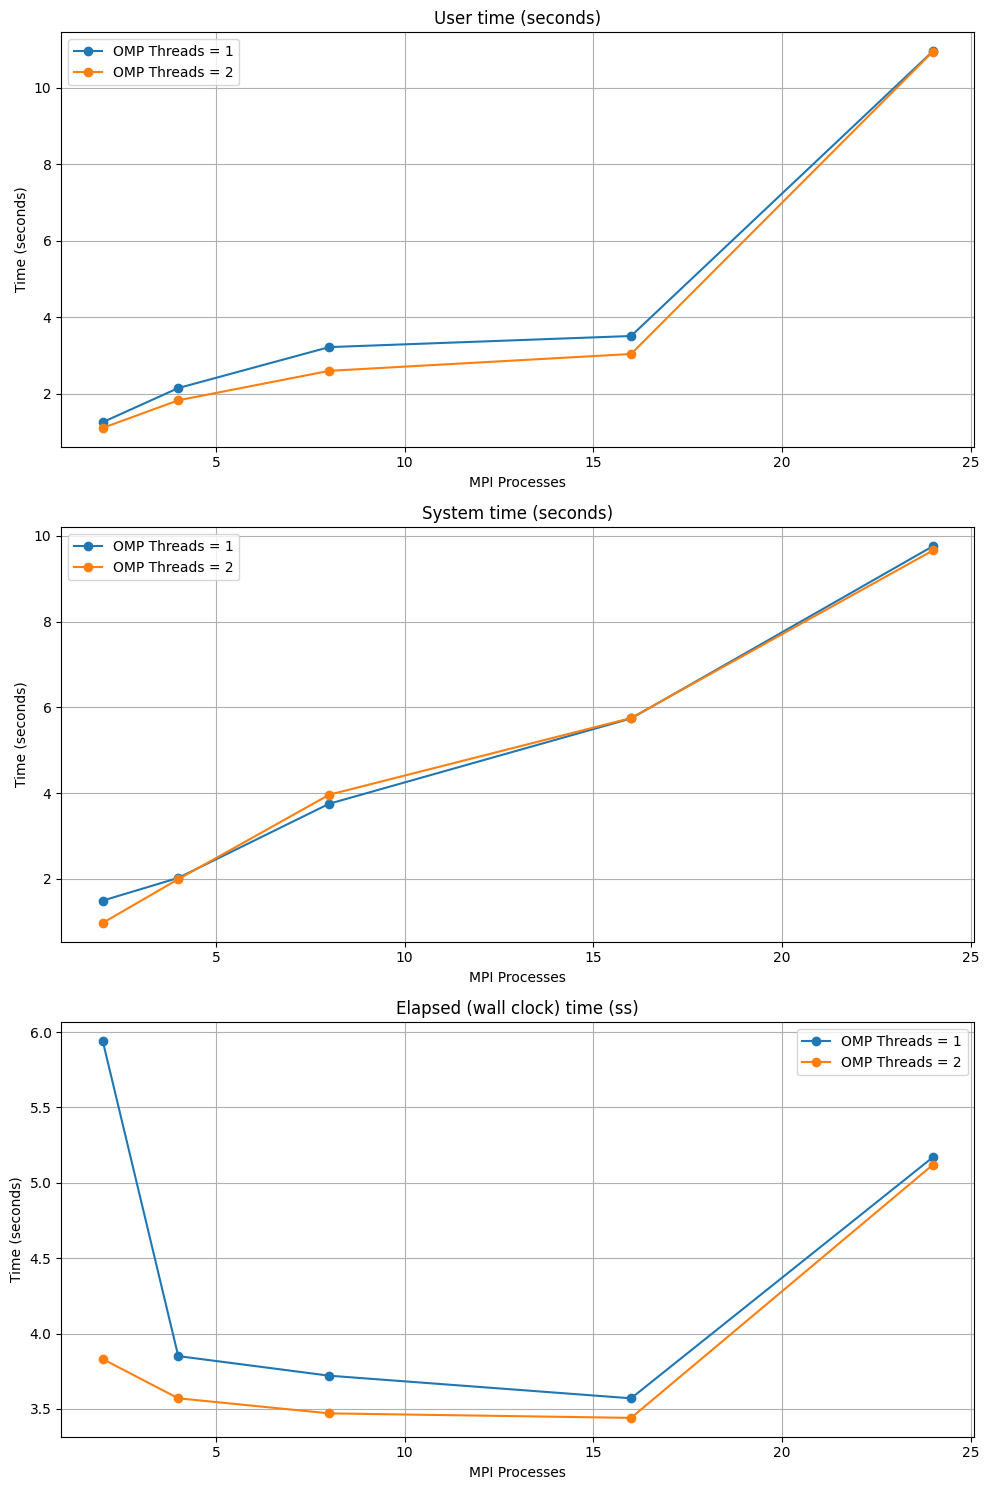

In [3]:
# Convert MPI Processes and OpenMP Threads to integers for sorting and plotting
data['MPI Processes'] = data['MPI Processes'].astype(int)
data['OpenMP Threads'] = data['OpenMP Threads'].astype(int)

# Sort data by MPI Processes and OpenMP Threads
data = data.sort_values(by=['MPI Processes', 'OpenMP Threads'])

# Extract unique values for MPI Processes and OpenMP Threads
mpi_processes = sorted(data['MPI Processes'].unique())
omp_threads = sorted(data['OpenMP Threads'].unique())

# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plot 'User time (seconds)'
for omp in omp_threads:
    subset = data[data['OpenMP Threads'] == omp]
    ax[0].plot(subset['MPI Processes'], subset['User time (seconds)'], marker='o', label=f'OMP Threads = {omp}')
ax[0].set_title('User time (seconds)')
ax[0].set_xlabel('MPI Processes')
ax[0].set_ylabel('Time (seconds)')
ax[0].grid(True)
ax[0].legend()

# Plot 'System time (seconds)'
for omp in omp_threads:
    subset = data[data['OpenMP Threads'] == omp]
    ax[1].plot(subset['MPI Processes'], subset['System time (seconds)'], marker='o', label=f'OMP Threads = {omp}')
ax[1].set_title('System time (seconds)')
ax[1].set_xlabel('MPI Processes')
ax[1].set_ylabel('Time (seconds)')
ax[1].grid(True)
ax[1].legend()

# Plot 'Elapsed (wall clock) time (ss)'
for omp in omp_threads:
    subset = data[data['OpenMP Threads'] == omp]
    ax[2].plot(subset['MPI Processes'], subset['Elapsed (wall clock) time (ss)'], marker='o', label=f'OMP Threads = {omp}')
ax[2].set_title('Elapsed (wall clock) time (ss)')
ax[2].set_xlabel('MPI Processes')
ax[2].set_ylabel('Time (seconds)')
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()
plt.show()


### Data Interpretation

# Bottlenecks

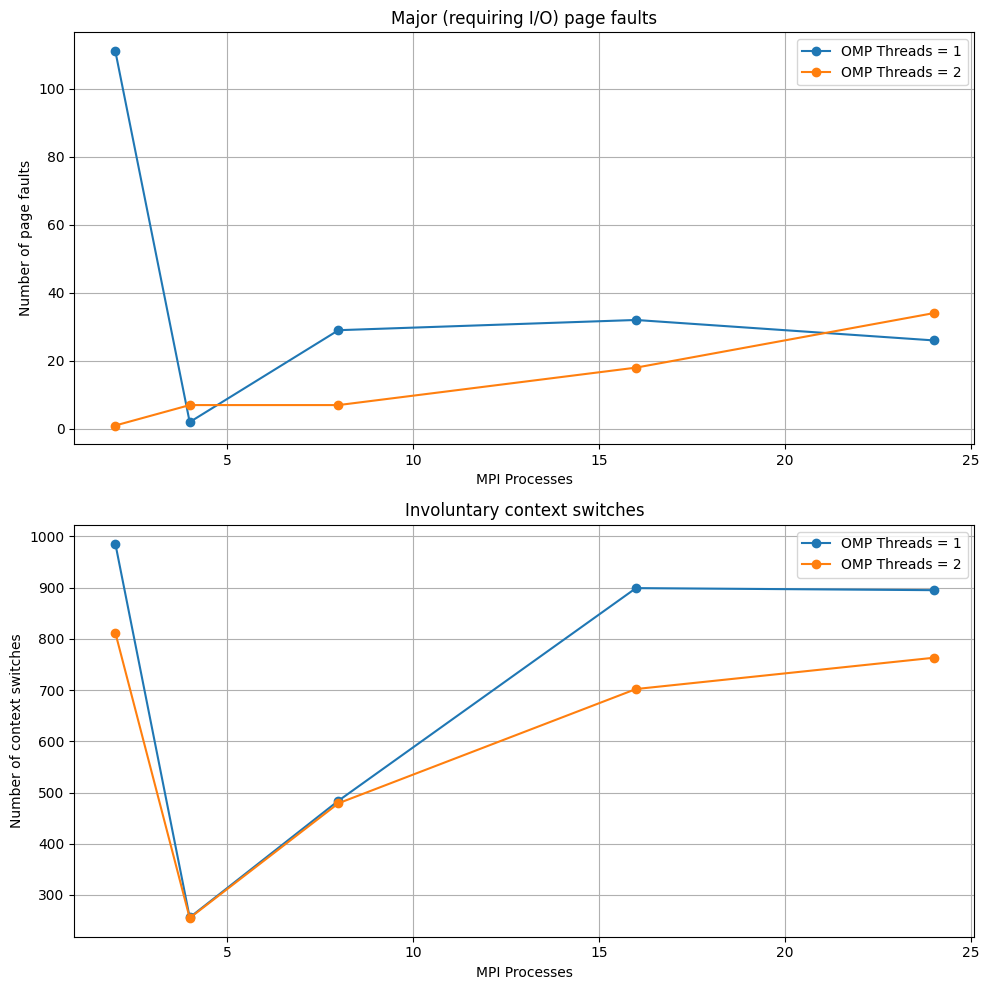

In [4]:
# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot 'Major (requiring I/O) page faults'
for omp in omp_threads:
    subset = data[data['OpenMP Threads'] == omp]
    ax[0].plot(subset['MPI Processes'], subset['Major (requiring I/O) page faults'], marker='o', label=f'OMP Threads = {omp}')
ax[0].set_title('Major (requiring I/O) page faults')
ax[0].set_xlabel('MPI Processes')
ax[0].set_ylabel('Number of page faults')
ax[0].grid(True)
ax[0].legend()

# Plot 'Involuntary context switches'
for omp in omp_threads:
    subset = data[data['OpenMP Threads'] == omp]
    ax[1].plot(subset['MPI Processes'], subset['Involuntary context switches'], marker='o', label=f'OMP Threads = {omp}')
ax[1].set_title('Involuntary context switches')
ax[1].set_xlabel('MPI Processes')
ax[1].set_ylabel('Number of context switches')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

### Data Interpretation

# Parallelisation impact


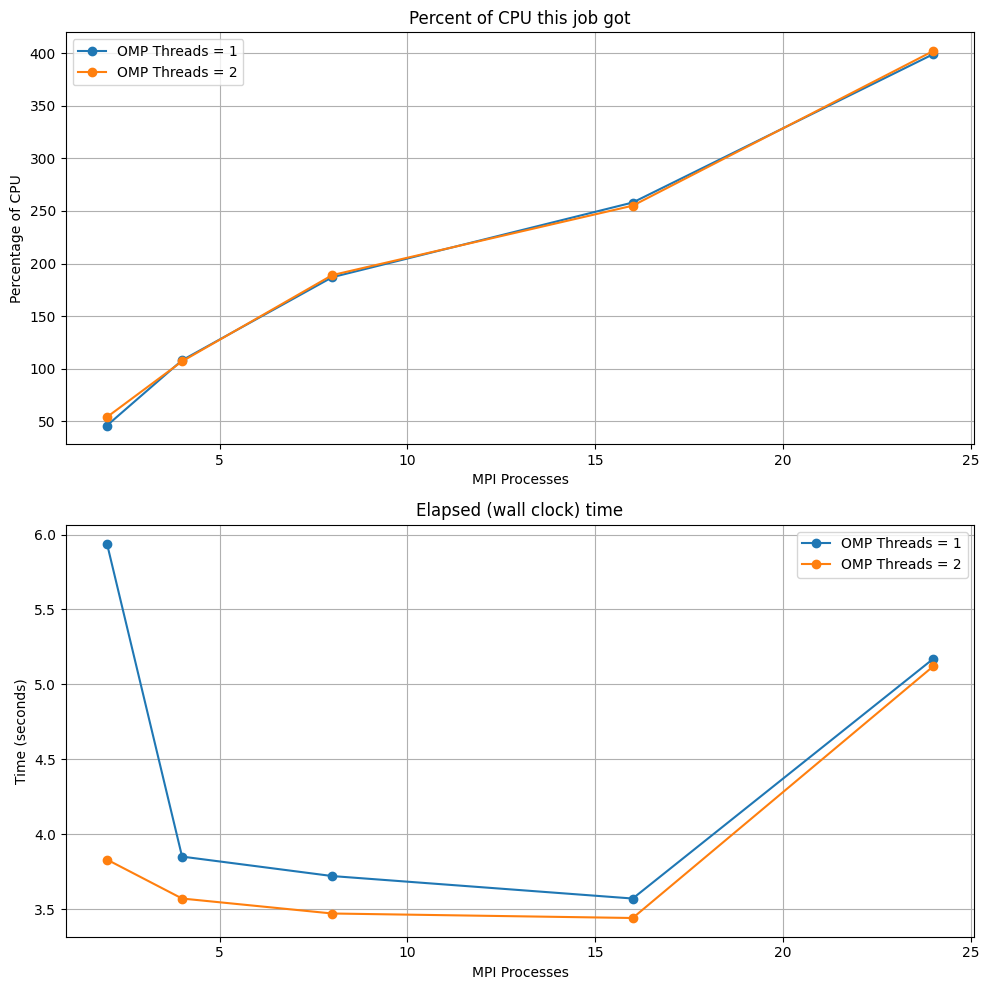

In [5]:
#Convert MPI Processes and OpenMP Threads to integers for sorting and plotting
data['MPI Processes'] = data['MPI Processes'].astype(int)
data['OpenMP Threads'] = data['OpenMP Threads'].astype(int)

# Convert 'Percent of CPU this job got' to numeric
data['Percent of CPU this job got'] = data['Percent of CPU this job got'].str.rstrip('%').astype('float')

# Sort data by MPI Processes and OpenMP Threads
data = data.sort_values(by=['MPI Processes', 'OpenMP Threads'])

# Extract unique values for MPI Processes and OpenMP Threads
mpi_processes = sorted(data['MPI Processes'].unique())
omp_threads = sorted(data['OpenMP Threads'].unique())

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot 'Percent of CPU this job got'
for omp in omp_threads:
    subset = data[data['OpenMP Threads'] == omp]
    ax[0].plot(subset['MPI Processes'], subset['Percent of CPU this job got'], marker='o', label=f'OMP Threads = {omp}')
ax[0].set_title('Percent of CPU this job got')
ax[0].set_xlabel('MPI Processes')
ax[0].set_ylabel('Percentage of CPU')
ax[0].grid(True)
ax[0].legend()

# Plot 'Elapsed (wall clock) time (ss)'
for omp in omp_threads:
    subset = data[data['OpenMP Threads'] == omp]
    ax[1].plot(subset['MPI Processes'], subset['Elapsed (wall clock) time (ss)'], marker='o', label=f'OMP Threads = {omp}')
ax[1].set_title('Elapsed (wall clock) time')
ax[1].set_xlabel('MPI Processes')
ax[1].set_ylabel('Time (seconds)')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()